In [1]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings

In [2]:
# 1A - 10 pts Task: Perform EDA on the dataset. Include both quantitative and qualitative descriptions. 
# Check for missing data and correlations.
df = pd.read_csv('hw1_data.csv')

df.info()

# We can observe that there are 4 attributes and 4972 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4972 non-null   object 
 1   IWM     4972 non-null   float64
 2   QQQ     4972 non-null   float64
 3   SPY     4972 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.5+ KB


In [3]:
df

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491
...,...,...,...,...
4967,2020-02-26,152.328430,215.254486,305.789459
4968,2020-02-27,146.964890,204.475845,292.055939
4969,2020-02-28,144.273254,204.634949,290.828827
4970,2020-03-02,148.907211,215.194824,303.423584


In [4]:
df.head()


,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491


In [5]:
# Check for missing values
df.isnull().sum()
# we observe no null values in our dataset

Date    0
IWM     0
QQQ     0
SPY     0
dtype: int64

In [6]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Date : ['2000-05-26' '2000-05-30' '2000-05-31' ... '2020-02-28' '2020-03-02'
 '2020-03-03']
IWM : [ 34.80086517  36.0853653   36.21621323 ... 144.27325439 148.9072113
 145.8704834 ]
QQQ : [ 67.67073822  74.4704361   72.34893799 ... 204.63494873 215.19482422
 208.29411316]
SPY : [ 93.36367798  96.40817261  96.61959076 ... 290.8288269  303.42358398
 294.73587036]


<AxesSubplot:>

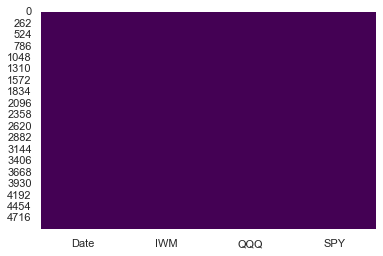

In [7]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
# we confirm there are no missing (null values) in our data

<AxesSubplot:>

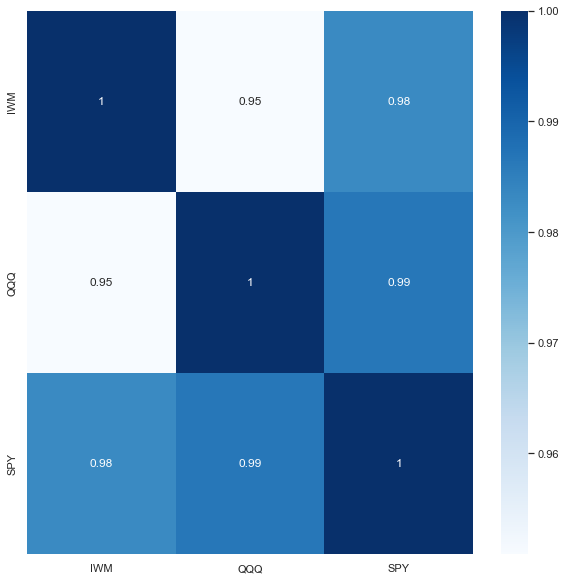

In [8]:
# Asking Analytical Questions and Visualizations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Now let's use the visualization to get insights on the data

# positive correlation

# negative correlation

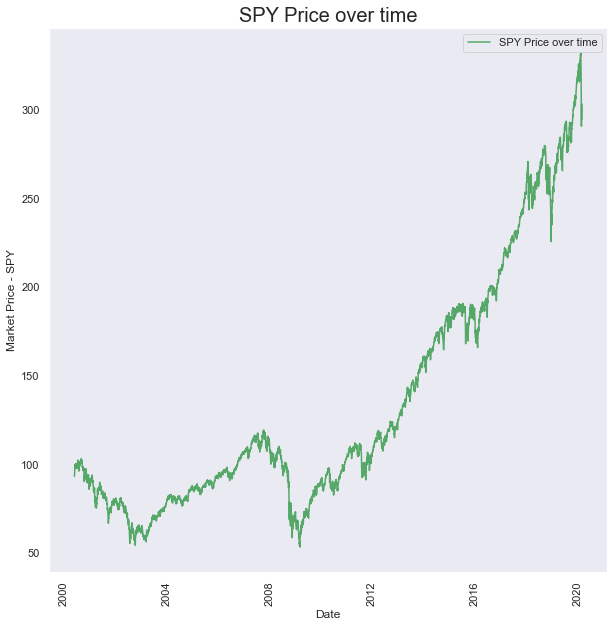

In [46]:
# How does the time affect the stock price?
import csv

x = df['Date']
x = pd.to_datetime(x)

y = df['SPY']


plt.figure(figsize=(10,10))  
plt.plot(x, y, color = 'g',label = "SPY Price over time")
  
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Market Price - SPY')
plt.title('SPY Price over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

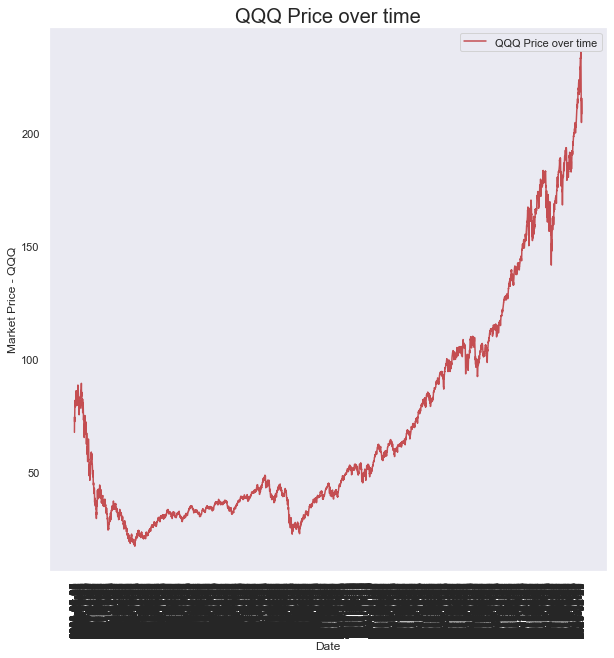

In [36]:
x = df['Date']
y = df['QQQ']
plt.figure(figsize=(10,10))  
plt.plot(x, y, color = 'r',label = "QQQ Price over time")
  
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Market Price - QQQ')
plt.title('QQQ Price over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

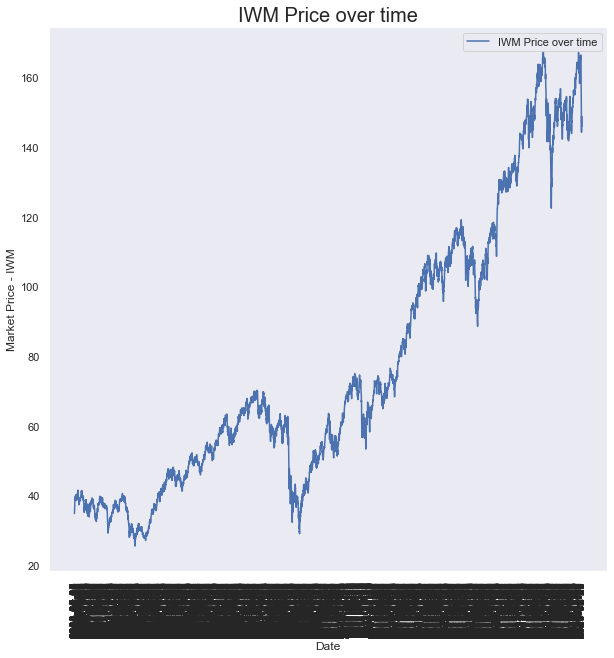

In [45]:
import matplotlib.ticker as mticker

x = df['Date']
y = df['IWM']
plt.figure(figsize=(10,10))  

plt.plot(x, y, color = 'b',label = "IWM Price over time")
  
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Market Price - IWM')
plt.title('IWM Price over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()